# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)


In [4]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [5]:
df = df.drop(columns=['Unnamed: 0','index'])
# Selecionando apenas colunas numéricas
df_numerico = df.select_dtypes(include='number')
matriz_correlacao = df_numerico.corr()
matriz_correlacao

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


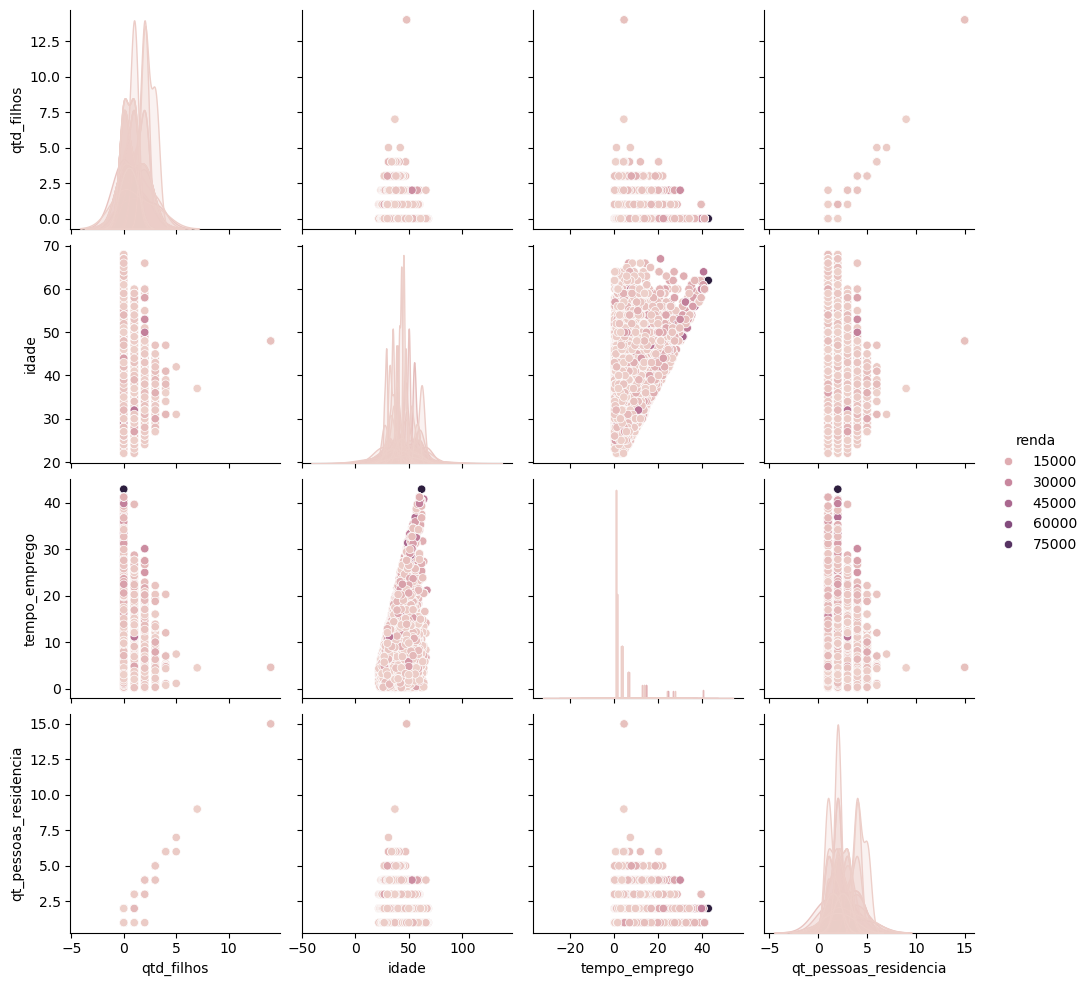

In [6]:
sns.pairplot(df_numerico, hue='renda')

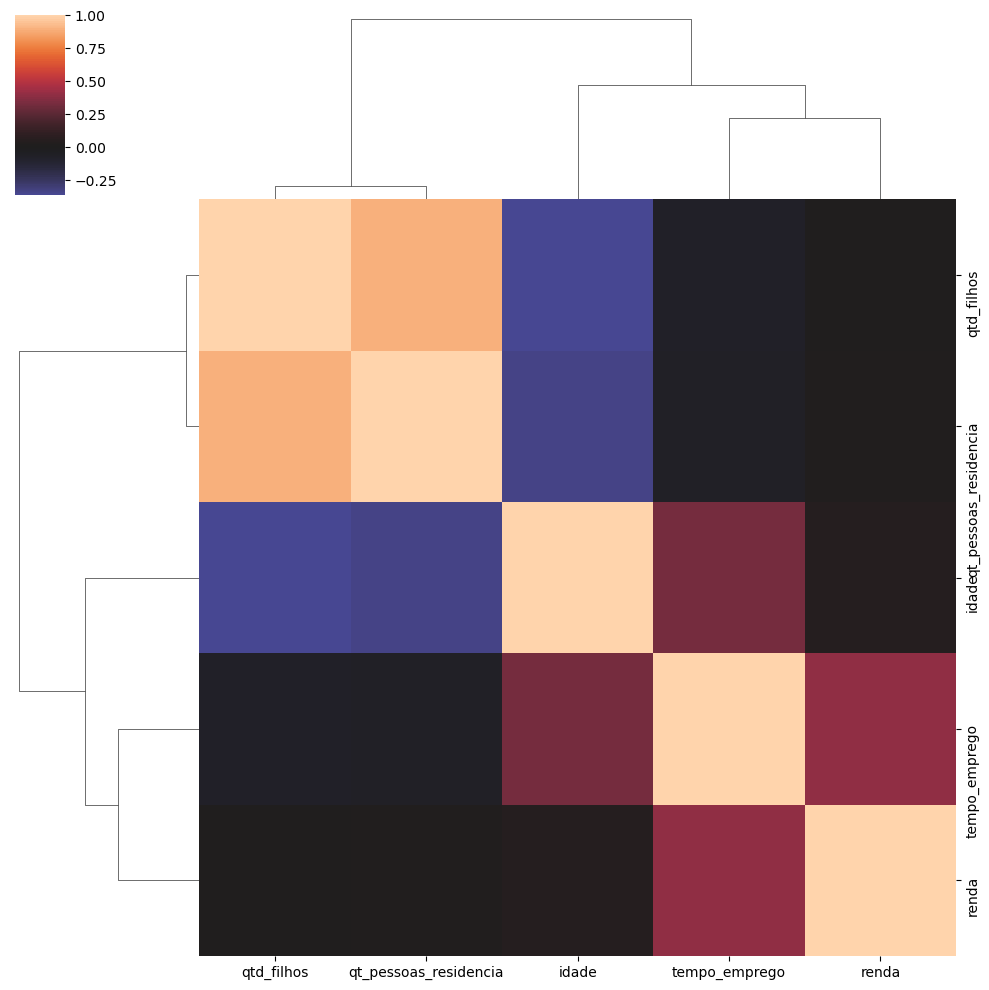

In [7]:
sns.clustermap(df_numerico.corr(),figsize=(10,10), center = 0)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

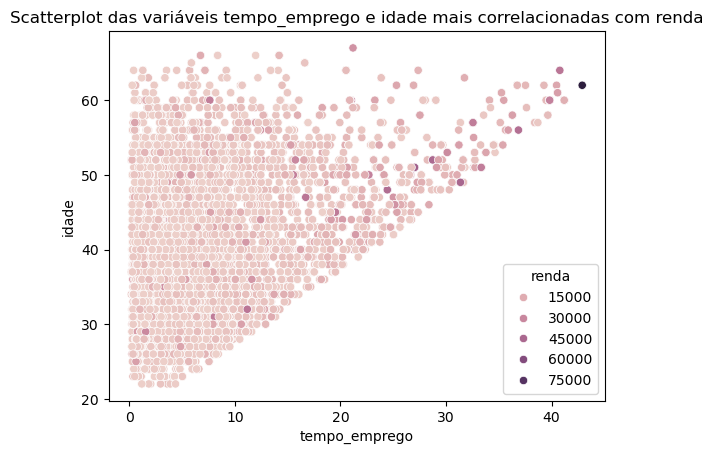

In [9]:

# Identificar as duas variáveis mais correlacionadas com 'renda'
correlated_vars = matriz_correlacao['renda'].abs().sort_values(ascending=False).index[1:3]

# Criar o gráfico de dispersão
sns.scatterplot(data=df_numerico, x=correlated_vars[0], y=correlated_vars[1], hue='renda')
plt.title(f'Scatterplot das variáveis {correlated_vars[0]} e {correlated_vars[1]} mais correlacionadas com renda')
plt.show()


3) Na su aopinião, há outliers na variável renda?

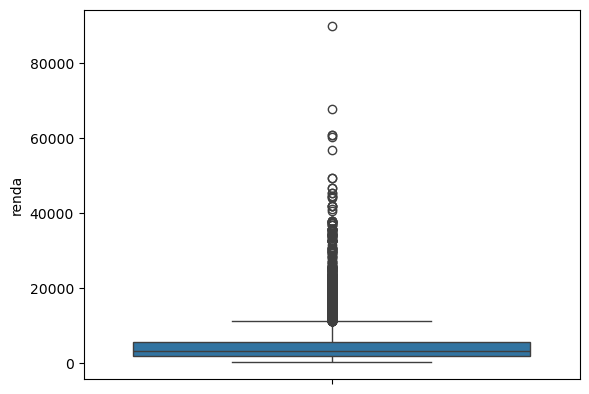

In [11]:
sns.boxplot(data=df_numerico,y='renda')
plt.show()

#considerando os dados coletados, temos alguns outliers, mas não necessariamente esses outliers são erros, pois quando cruzado com as váriaveis mais correlacionadas, ela se explica por conta da idade da pessoa e o tempo de emprego

4) Calcule o logaritmo da variável renda e repita a sequência de análise

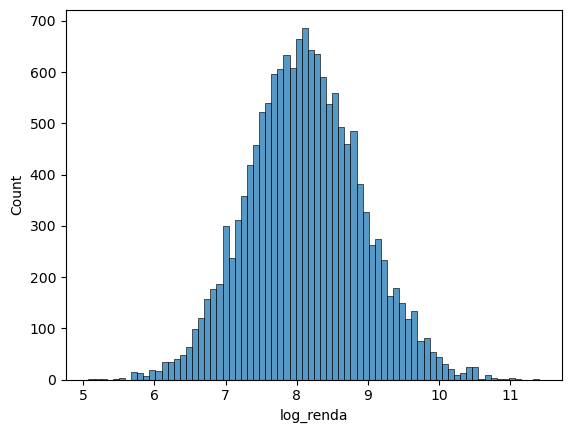

In [26]:
df["log_renda"] = np.log(df["renda"])
sns.histplot(data=df, x="log_renda");

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

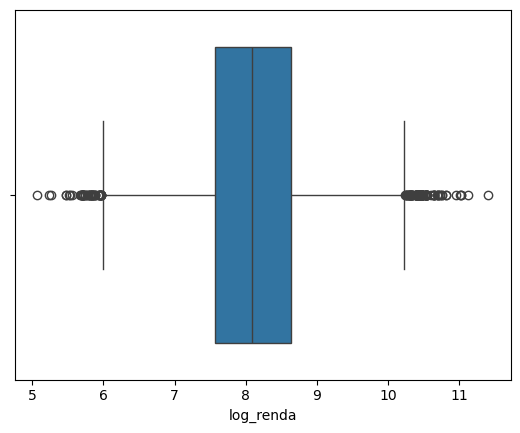

In [28]:
sns.boxplot(data=df, x="log_renda");
#tornando mais fácil ver padrões e tendências.